In [1]:
from ForecastDataPrep import ForecastDataPreparation

In [2]:
DataPrep = ForecastDataPreparation()

In [3]:
DataPrep.Run()

Data Preparation Started
PreProcess Started
PromotionsPrep Started
PromotionsPrep Ended
PreProcess Ended
Main Started
SparkOpetaions Started
SparkOpetaions Ended
write started
write ended
Main Ended
Data Preparation Completed Successfully


In [4]:
import pandas as pd

In [5]:
data_prep = pd.read_parquet('Data/Sales_Data_v2.parquet')

In [10]:
data_prep["Date"].count()

8931111

In [12]:
data_prep.head()

,Date,LocationId,MainDistributorId,DistributorId,PackageId,ProductId,City,District,BrickId,PaidQty,FreeQty,isPromoted,Discount,BeginDate,EndDate,Promo,DStep,WeekStartDate
0,2023-01-02,2854453,2879223,2878715,568,29,Afyon,DİNAR,30601,10,0,0,0.0,NaT,NaT,None,0.0,2023-01-02
1,2022-06-29,2867763,2879249,2878795,568,29,Gaziantep,ŞEHİTKAMİL,270202,15,0,0,0.0,NaT,NaT,None,0.0,2022-06-27
2,2023-01-04,2877675,2879223,2878715,568,29,Uşak,BANAZ,640101,3,0,0,0.0,NaT,NaT,None,0.0,2023-01-02
3,2022-06-29,2918985,2879249,2878795,568,29,Şanlıurfa,HALİLİYE,630001,15,0,0,0.0,NaT,NaT,None,0.0,2022-06-27
4,2023-01-04,2854545,2879223,2878715,568,29,Afyon,MERKEZ,30001,20,0,0,0.0,NaT,NaT,None,0.0,2023-01-02


In [20]:
by = ["Date","ProductId","isPromoted"]

In [34]:
data_prep[data_prep.Promo.isnull()].groupby("ProductId").ProductId.count()\
/data_prep.groupby("ProductId").ProductId.count()

ProductId
14     0.392871
15     1.000000
16     0.469178
20     0.744872
21     0.822796
25     1.000000
29     0.973098
30     0.246618
32     0.487455
38     0.330767
39     0.515496
41     0.141936
45     1.000000
49     0.518673
64     1.000000
72     1.000000
76     1.000000
138    0.875694
148    0.449941
163    1.000000
Name: ProductId, dtype: float64

In [ ]:
from matplotlib import pyplot as plt

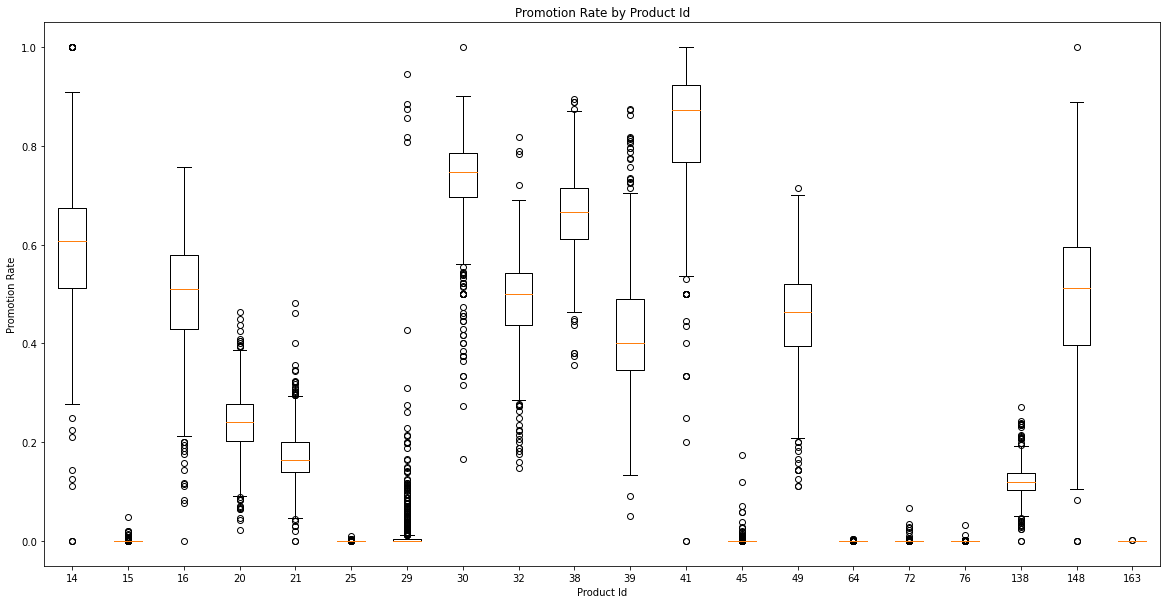

In [105]:
fig, ax = plt.subplots(figsize=(20,10))
ax.boxplot(c.apply(lambda x: x.isPromoted.values))
ax.set_xticklabels(c.groups.keys())
plt.xlabel("Product Id")
plt.ylabel("Promotion Rate")
plt.title("Promotion Rate by Product Id")
plt.show()

Except ProductId = 29 others have either in sale or in non-sale. Therefore, no machine learning models can learn the effect of campaign in sales.

In [112]:
a = data_prep.loc[data_prep.ProductId == 21,["Date","Promo","BeginDate","EndDate"]]

In [113]:
x = a.drop_duplicates( ignore_index=True)

In [116]:
x.loc[x.Promo.notnull(), ["Promo","BeginDate","EndDate"]].drop_duplicates( ignore_index=True).\
sort_values(by=["BeginDate","EndDate"],ignore_index=True)

,Promo,BeginDate,EndDate
0,15-1,2022-02-01,2022-03-01
1,50-10,2022-02-01,2022-03-01
2,30-5,2022-02-01,2022-03-01
3,15-1,2022-03-01,2022-04-01
4,50-10,2022-03-01,2022-04-01
5,30-5,2022-03-01,2022-04-01
6,50-10,2022-04-01,2022-05-01
7,15-1,2022-04-01,2022-05-01
8,30-5,2022-04-01,2022-05-01
9,15-1,2022-05-01,2022-06-01


In [103]:
data_prep[(data_prep.ProductId == 29) &
          (data_prep.Date>="2023-04-01") &
          (data_prep.Date<"2023-09-30")].groupby("WeekStartDate")["PaidQty"].sum()

WeekStartDate
2023-03-27      8147
2023-04-03     84319
2023-04-10     42209
2023-04-17     30794
2023-04-24     50883
2023-05-01     45598
2023-05-08    104152
2023-05-15     35259
2023-05-22     52525
2023-05-29     59840
2023-06-05     88068
2023-06-12     74985
2023-06-19     57849
2023-06-26     13583
2023-07-03     62647
2023-07-10     60647
2023-07-17     71771
2023-07-24     28261
2023-07-31     48175
2023-08-07     30816
2023-08-14     34473
2023-08-21     31442
2023-08-28     33727
2023-09-04     35934
2023-09-11     36238
2023-09-18     35916
2023-09-25     31629
Name: PaidQty, dtype: int64

In [15]:
keys = ["Date","LocationId","MainDistributorId","DistributorId","PackageId",
        "BrickId","PaidQty","FreeQty"]

In [ ]:
data_prep2.groupby(keys).filter(lambda x : x.len()>1)